## TBDM MOVIE LIST

Introduction :

Data Description : The data set contains information about 10,000 movies from TMDB. The dataset contains movies from 1060 to 2015.

---


Columns Description :

* id, imdb_id: unique id or imdb id for each movie on TMDB
* popularity: a metric used to measure the popularity of the movie.
* budget:the total budget of the moviein USD.
* revenue:the total revenue of the movie in USD.
* original_title: the original title of the movie.
* cast:the names of the cast of the movie separated by "|".
* homepage: the website of the movie (if it existed).
* director:name(s) of the director(s) of the movie (separated by "|" if there are more than one director).
* tagline:a catchphrase describing the movie.
* keywords: keywords related to the movie.
* overview:summary of the plot of the movie.
* runtime:total runtime of the movie in minutes.
* genres: genres of the movie separated by "|".
* production_companies:production compan(y/ies) of the movie.
* release_date:release date of the movie.
* vote_count:number of voters of te movie.
* vote_average:the average user rating of the movie.
* release_year:release year of the movie (from 1960 to 2015).
* budget_adj:the total budget of the moviein USD in terms of 2010 dollars.
* accounting for inflation over time.
* revenue_adj:the total budget of the movie in USD in terms of 2010 dollars.
* accounting for inflation over time.


---

Questions for analysis


1. Do movies with high popularity achive high revenvue?
2. What are the most filmed genres in this whole dataset?
3. Is there a correlation between a movie budget and its revenue?



---



Importing Important Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data-set file

In [2]:
df = pd.read_csv('/content/tmdb-mov-list.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Data Cleaning

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.nunique()

,0
id,10865
imdb_id,10855
popularity,10814
budget,557
revenue,4702
original_title,10571
cast,10719
homepage,2896
director,5067
tagline,7997


In [6]:
df.vote_average

,vote_average
0,6.5
1,7.1
2,6.3
3,7.5
4,7.3
...,...
10861,7.4
10862,5.7
10863,6.5
10864,5.4


In [7]:
df.duplicated().sum()

1

From above outputs we infer that :
- There is a total of 10866 rows and 21 columns
- There is only duplicate value
- We should remove few columns which is not useful
- We can append a col that says profit of the movie using (profit = revenue - budget)


In [8]:
df.drop_duplicates(inplace = True)
df.duplicated().any()

False



---



In [9]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [10]:
# dropping unusful columns
df.drop(['id','imdb_id','homepage','revenue_adj','budget_adj','cast','tagline','overview','keywords','production_companies','director','release_date'], axis=1, inplace=True)


In [11]:
df.shape

(10865, 9)

Checking for null values and remove those null values.

In [12]:
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
runtime,0
genres,23
vote_count,0
vote_average,0
release_year,0


In [13]:
df.dropna(inplace=True)
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
runtime,0
genres,0
vote_count,0
vote_average,0
release_year,0


Working on genres column
Removing '|' and just retaining the first genre.

In [14]:
df['genres'] = df['genres'].apply(lambda x:x.split('|')[0])
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,7.3,2015


Adding a profit column to gauge out the earnings.

In [15]:
df['profit'] = df.revenue - df.budget
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,7.3,2015,1316249360


In [17]:
def categorize_col(df, col, label):
  edges = list(df[col].describe()[3:])
  df[col] = pd.cut(df[col], edges, labels=label, duplicates='drop')
  return df

Converting vote_average column with

In [20]:
lab = ['non_popular','below_avg','average','popular']
categorize_col(df,'vote_average', lab)

df['vote_average'].unique()

['average', 'popular', 'below_avg', 'non_popular', NaN]
Categories (4, object): ['non_popular' < 'below_avg' < 'average' < 'popular']

Dropping the null value columns (outliers)

In [24]:
df.dropna(inplace=True)
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
runtime,0
genres,0
vote_count,0
vote_average,0
release_year,0
profit,0


Similarly converting profit column into categorical varable

In [25]:
lab = ['low','average','high']
categorize_col(df, 'profit', lab)
df['profit'].unique()

['high', 'average', 'low', NaN]
Categories (3, object): ['low' < 'average' < 'high']

In [29]:
df.dropna(inplace=True)
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
runtime,0
genres,0
vote_count,0
vote_average,0
release_year,0
profit,0


In [30]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,average,2015,high
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,popular,2015,high
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,average,2015,high
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,popular,2015,high
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,popular,2015,high


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10864
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   popularity      10839 non-null  float64 
 1   budget          10839 non-null  int64   
 2   revenue         10839 non-null  int64   
 3   original_title  10839 non-null  object  
 4   runtime         10839 non-null  int64   
 5   genres          10839 non-null  object  
 6   vote_count      10839 non-null  int64   
 7   vote_average    10839 non-null  category
 8   release_year    10839 non-null  int64   
 9   profit          10839 non-null  category
dtypes: category(2), float64(1), int64(5), object(2)
memory usage: 783.6+ KB


## Exploratory Data Analysis

Answering The Questions

Q1 : Do movies with high popularity achieve high revenue?

In [32]:
df['popularity'].mean()

0.6476021913460651

In [33]:
less_popular = df.query('popularity <= 0.647')
more_popular = df.query('popularity > 0.647')

In [34]:
print(less_popular.revenue.mean(), more_popular.revenue.mean())

7689823.871224779 121933819.08567691


From above calculations it is clear that the Movies that are popular achieve higher revenues.



---


Q2 : What are the most filmed genres in this whole dataset?

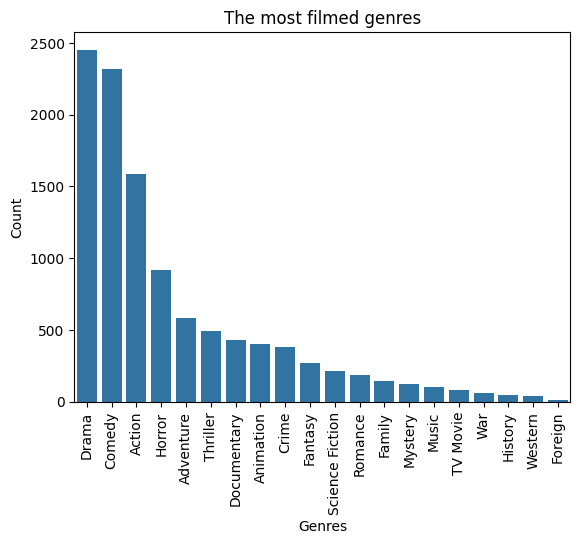

In [61]:
# sns.countplot(data=df,x=df['genres'])
sns.countplot(data=df, x='genres', order=df['genres'].value_counts().index)
plt.xticks(rotation=90)
plt.title("The most filmed genres")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()

In [62]:
df['genres'].describe()

,genres
count,10839
unique,20
top,Drama
freq,2453


We infer that Drama, Comedy, and Action are the most filmed genres in total dataset.

---

Q3 : Is there a correleation between a mocie budget and it's revenue?


Text(0.5, 1.0, 'Heatmap of all numeric columns')

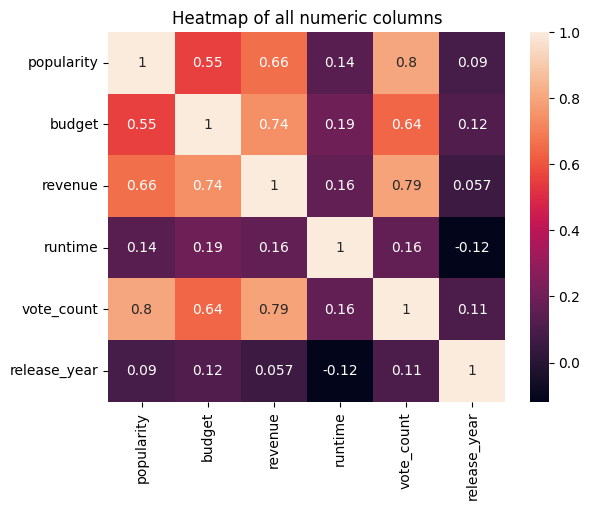

In [71]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Heatmap of all numeric columns")

Text(0, 0.5, 'Revenue')

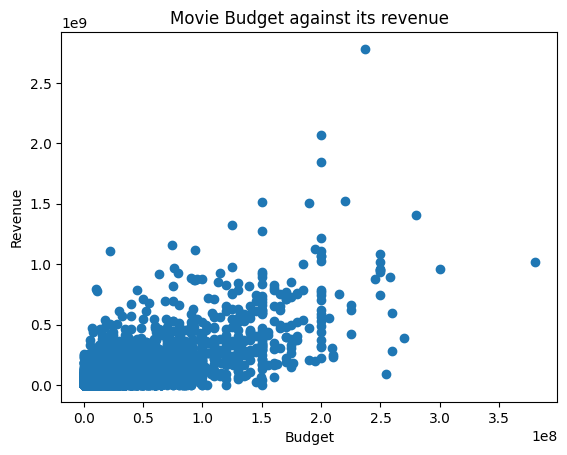

In [65]:
plt.scatter(df['budget'],df['revenue'])
plt.title("Movie Budget against its revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")

From above heatmap and scatterplot we notice a positive correlation between budget and revenue with little outliers.



---


#Conclusion

Q1 : Do movies with high popularity achieve high revenue?
- Movies that are popular achieve higher revenue

Q2 : What are the most filmed genres in this whole dataset?
- Drama, Comedy, and Action are the most filmed genres.

Q3 : Is there a correleation between a movie budget and it's revenue?
- Yes there is a high positive correlation between movie's budget and it's revenue.